In [86]:
# Reading in Rasters
# Rasterio tutorial here: 
#https://automating-gis-processes.github.io/CSC18/lessons/L6/reading-raster.html

# First, load packages
import pandas as pd
import os
import fiona
import rasterio
from rasterio.mask import mask
from rasterio.plot import show
import numpy as np
import shapely as sp
import geopandas as gpd
from fiona.crs import from_epsg
import pycrs

os.chdir("/Users/anayahall/projects/grapevine")

from scripts.fxns import epsg_meters

# import matplotlib.pyplot as plt

# from geopandas import GeoSeries, GeoDataFrame
# # only for jupyter nb to show plots inline
%matplotlib inline 


In [97]:
# now load SHAPEFILE for all CA COUNTIES to merge this
county = gpd.read_file("data/raw/CA_Counties/CA_Counties_TIGER2016.shp")

county.crs
# county.head()


{'init': 'epsg:3857'}

In [98]:
# os.chdir("/Volumes/My Passport/CAland")
gl_wp = gpd.read_file("data/raw/CA_FMMP_G/gl_bycounty/grazingland_county.shp")


In [101]:
gl = epsg_meters(gl_wp)
gl.crs


{'init': 'epsg:26911', 'no_defs': True}

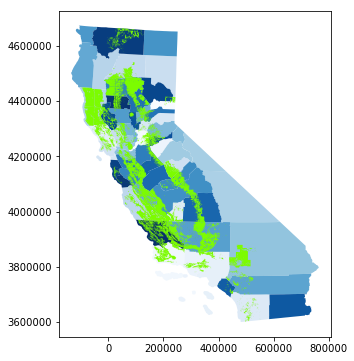

In [96]:
# gl2.plot()
# county2.plot()

# gl2.plot(ax=county2.plot(cmap='Blues', figsize=(10, 6)), color = 'lawngreen')
gl

In [91]:
# lc = "data/interim/CAMLC2010/California Augmented Multisource Landcover 20101.tif"

# raster = rasterio.open(lc)
# # type(raster)

# county = county.to_crs(crs=raster.crs.data)

# # # info about raster
# print("raster crs: ", raster.crs)
# # print("*********")
# # print("raster bounds: ", raster.bounds)
# # print("*********")
# # print("count: ", raster.count)
# # print("*********")
# # print("driver: ", raster.driver)
# # print("*********")
# # print("metadata: ", raster.meta)

# def getFeatures(gdf):
#     """Function to parse features from GeoDataFrame in such a manner that rasterio wants them"""
#     import json
#     return [json.loads(gdf.to_json())['features'][0]['geometry']]

In [92]:
# coords = getFeatures(county)
# print(coords)

In [93]:
# out_img, out_transform = mask(raster, shapes=coords, crop=True)

In [94]:
# out_meta = raster.meta.copy()
# print(out_meta)

In [95]:
# epsg_code = int(raster.crs.data[''][5:])
# print(raster.crs.data)
# print(epsg_code)